**Gene subpaneling**

The purpose of the following code is to cluster genes into sub-panels. It is also practice and application of the following:
- using Python to access web data
- using Python to create and control SQL-based databaseses
- using Python/sci-kit learn to run k-means

In [1]:
# Import packages
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
% matplotlib inline

import re

# using the mygene.info API
import urllib
import json
import sqlite3

In [2]:
# set the right directory
path2 = 'C:\\Users\\Benjamin.Lacar\\Documents\\Box\\Box Sync\\BL (Benjamin.Lacar@fluidigm.com)\\Juno_AccessArray\\Niagara\\DDR_geneAnnotation'
os.chdir(path2) 
cwd = os.getcwd()
print(cwd)

C:\Users\Benjamin.Lacar\Documents\Box\Box Sync\BL (Benjamin.Lacar@fluidigm.com)\Juno_AccessArray\Niagara\DDR_geneAnnotation


## Import new gene list and filter by PMID (publication) mentions.

In [3]:
dfGM = pd.read_excel('C:\\Users\\Benjamin.Lacar\\Documents\\Box\\Box Sync\\BL (Benjamin.Lacar@fluidigm.com)\\Juno_AccessArray\\Niagara\\MeetingWTom_170811\\fluidigm_072517.xlsx')

In [4]:
# dfGM.set_index('MM', inplace=True)

In [5]:
dfGM.head()

,MM,gene,transcript_ length(bp),manual_ review,comments,disease_ related,gene_disease_ta_pmid_count,gene_disease_ta_or_keywords_pmid_count,gene_disease_full_pmid_count,average_mentions_per_pmid_gene_diease_full,...,Unnamed: 99,Unnamed: 100,Unnamed: 101,Unnamed: 102,Unnamed: 103,Unnamed: 104,Unnamed: 105,Unnamed: 106,Unnamed: 107,Unnamed: 108
0,atm,atm,4871,yes,NaN,NaN,2820,2892,5724.0,13.5019,...,18591560,Sporadic epithelial ovarian cancer: clinical r...,22869732,860064,22869732,BRCA1 and HSP90 cooperate in homologous and no...,24210882,860064,24210882,Challenging resistance mechanisms to therapies...
1,tp53,tp53,1178,yes,NaN,NaN,2174,2347,6248.0,35.9036,...,21060032,TP53 mutation is frequently associated with CT...,20603439,860105,20603439,BRCA1 mRNA expression and outcome to neoadjuva...,20818418,860105,20818418,Harnessing the complexity of DNA-damage respon...
2,brca1,brca1,8496,yes,NaN,NaN,2000,2141,5975.0,16.5968,...,19035454,The DNA repair proteins BRCA1 and ERCC1 as pre...,11433401,860103,11433401,"Survival of breast cancer patients in BRCA1, B...",15863145,860090,15863145,Intra-abdominal carcinomatosis after prophylac...
3,brca2,brca2,13521,yes,NaN,NaN,1825,1920,4214.0,12.2584,...,19035454,The DNA repair proteins BRCA1 and ERCC1 as pre...,11433401,860103,11433401,"Survival of breast cancer patients in BRCA1, B...",15863145,860090,15863145,Intra-abdominal carcinomatosis after prophylac...
4,xrcc1,xrcc1,3702,yes,NaN,NaN,1108,1113,3105.0,12.97,...,20104979,Lack of influence of XRCC1 and XPD gene polymo...,22551904,860054,22551904,Genetic polymorphism of XRCC1 Arg399Gln is ass...,22456434,860027,22456434,Study on the DNA repair gene XRCC1 and XRCC3 p...


In [6]:
dfGM.tail()

,MM,gene,transcript_ length(bp),manual_ review,comments,disease_ related,gene_disease_ta_pmid_count,gene_disease_ta_or_keywords_pmid_count,gene_disease_full_pmid_count,average_mentions_per_pmid_gene_diease_full,...,Unnamed: 99,Unnamed: 100,Unnamed: 101,Unnamed: 102,Unnamed: 103,Unnamed: 104,Unnamed: 105,Unnamed: 106,Unnamed: 107,Unnamed: 108
573,trip13,trip13,4045,yes,NaN,NaN,0,0,24.0,3.125,...,26870961,Chromosome Synapsis Alleviates Mek1-Dependent ...,22900064,0,22900064,Sensitivity to TOP2 targeting chemotherapeutic...,24992337,0,24992337,"Meiosis-specific cohesin component, Stag3 is e..."
574,tti1,tti1,4448,yes,NaN,non-disease,0,0,6.0,2.83333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
575,tti2,tti2,1671,yes,NaN,non-disease,0,0,6.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
576,ube2nl,ube2nl,1908,NaN,NaN,NaN,0,0,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
577,zswim7,zswim7,742,yes,NaN,non-disease,0,0,4.0,1.75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


(0, 0.002)

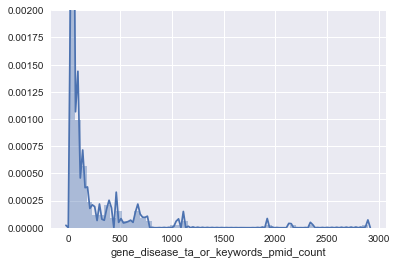

In [7]:
# histogram plot to show gene_disease_ta_pmid_count
ax = sns.distplot(dfGM.loc[:,'gene_disease_ta_or_keywords_pmid_count'])
plt.ylim(0,0.002)

In [8]:
dimRemovedGenes = dfGM[dfGM.loc[:,'gene_disease_ta_or_keywords_pmid_count']<1].shape

In [9]:
print('number of genes removed: ', dimRemovedGenes[0])

number of genes removed:  85


In [10]:
# df with updated gene list
dfGM2 = dfGM[dfGM.loc[:,'gene_disease_ta_or_keywords_pmid_count']>0]

In [11]:
dfGM2 = dfGM2.set_index('gene')

### Get number of citations for each PMID to establish weights.
Can't do this right now

In [12]:
dfPMIDsTX = pd.DataFrame(dfGM2['tx_pmids'].str.split(';').tolist())
dfPMIDsPX = pd.DataFrame(dfGM2['px_pmids'].str.split(';').tolist())

In [13]:
# dfPMIDsTX.set_index(dfGM2.index, inplace=True)
# dfPMIDsPX.set_index(dfGM2.index, inplace=True)


In [14]:
dfPMIDsPX.head()

,0,1,2,3,4,5,6,7,8,9,...,282,283,284,285,286,287,288,289,290,291
0,15317748,15956042,24225019,19252415,12383682,20818418,15796958,18591560,22869732,24210882,...,None,None,None,None,None,None,None,None,None,None
1,20182602,18066063,10786679,24225019,10389907,12383682,20308654,21060032,20603439,20818418,...,None,None,None,None,None,None,None,None,None,None
2,15317748,21195000,24225019,10389907,11237395,12383682,20603439,19035454,11433401,15863145,...,None,None,None,None,None,None,None,None,None,None
3,14651845,15317748,21195000,24225019,10389907,11237395,12383682,19035454,11433401,15863145,...,None,None,None,None,None,None,None,None,None,None
4,14744728,17952468,15596292,19683826,19101034,16144922,22452940,20104979,22551904,22456434,...,None,None,None,None,None,None,None,None,None,None


## For each gene, pull GOterms from json

In [15]:
# for gene in dfGM2['gene']:
for gene in dfGM2.iloc[0:10,0]:
    # get the json file for a gene name
    baseURL = 'http://mygene.info/v3/query'
    appendString = '?q='+gene+'&species=human'
    searchURL = baseURL+appendString
    connection1 = urllib.request.urlopen(searchURL)
    data1 = connection1.read()
    js1 = json.loads(data1.decode())
    print(gene)
    try:
        #js1['hits'][0]['_id']      # there are different gene IDs, start by taking the first one
        for i, GN in enumerate(js1['hits']):   # try evaluating different gene IDs 
            searchedGene = GN['_id']  
            searchBaseURL = 'http://mygene.info/v3/gene/'
            appendString_x = searchedGene
            searchURL1 = searchBaseURL+appendString_x
            connection2 = urllib.request.urlopen(searchURL1)    # python 3 modification
            data2 = connection2.read()
            js = json.loads(data2.decode())
            # choose which GO term category to do
            # goSubcats = ['CC', 'MF', 'BP']
            goSubcats = ['BP']
            # myGenePMIDs = list()
            try:
                for i, subcatEvidence in enumerate(js['go']['BP']):
                # print(i, subcatEvidence)
                    try:
                        # only get GO terms if the pubmed ID is also in the Genomenon list
                         if (str(subcatEvidence['pubmed']) in dfPMIDsTX.loc[gene,:].tolist()) or (str(subcatEvidence['pubmed']) in dfPMIDsPX.loc[gene,:].tolist()):
                                print('----------', gene, 'publication with GO term also on Genomenon publication list', subcatEvidence['pubmed'], subcatEvidence['term'])
                                #myGenePMIDs.append(str(subcatEvidence['pubmed']))
                    except: continue
            except: continue
    except: continue

atm
tp53
brca1


ConnectionAbortedError: [WinError 10053] An established connection was aborted by the software in your host machine

Multiply GOterm (BP) by PMID weight.
Doesn't make sense to do.

## Use other resources

### Create dataframe for druggable genome

In [ ]:
for gene in dfGM2['gene']:
    print(gene)

In [ ]:
dfDG = pd.read_excel('dgidb_export_2017-09-08.xlsx')

In [ ]:
# dfDG.drop(['search_term', 'match_type'], axis=1, inplace=True)
# dfDG.set_index('gene', inplace=True)

In [ ]:
dfDG

In [ ]:
dfDG2 = dfDG.pivot_table(index='match_term', columns='drug', aggfunc=len, fill_value=0)

In [ ]:
dfDG2.index

In [ ]:
print('No. of genes with annotations on druggable genome: ', len(dfDG2.index))
print('Total no. of genes of interest: 493')

In [ ]:
dfDG2.head()

### Apply Genomenon "putative therapies" listing

In [ ]:
# if there are genes that don't have putative therapies, remove for now
dfGM3 = dfGM2[~pd.isnull(dfGM2['putative_therapies'])]

In [ ]:
dfGM2.head()

In [ ]:
print('No. of genes without putative therapy listed: ', dfGM2.shape[0]-dfGM3.shape[0])

In [ ]:
# make a conscious decision to ignore numbers (this is str.place method in combination with regular expressions)
# \d = digit, + = 1 or more, parentheses means it's a capturing group

dfGM3['putative_therapies'] = dfGM3['putative_therapies'].str.replace('\d+', '')

In [ ]:
dfGM3['putative_therapies']

In [ ]:
dfPutTher = pd.DataFrame(dfGM3['putative_therapies'].str.split('|').tolist())

In [ ]:
dfPutTher.head()

In [ ]:
# dfPutTher.set_index(dfGM3.index, inplace=True)

In [ ]:
dfPutTher2 = pd.DataFrame(0, index=np.arange(len(dfPutTher)), columns=range(48))

In [ ]:
for i, row in dfPutTher.iterrows():
    b = row[row.isnull()]   
    try:
        dfPutTher2.loc[i,:] = row[:(b.index[0]-1)]
    except:
        continue

In [ ]:
dfPutTher3 = dfPutTher2.iloc[484:,:]

In [ ]:
dfPutTher3['gene'] = dfPutTher3.index

In [ ]:
dfTest = pd.melt(dfPutTher3, id_vars='gene')

In [ ]:
# dfTest.drop('variable', axis=1, inplace=True)
dfTest.index

In [ ]:
dfTest2 = dfTest.pivot_table(index='gene', columns='value', aggfunc=len, fill_value=0)

In [ ]:
dfTest2.head()

In [ ]:
dfTest2.columns

## Apply k-means method

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
km = KMeans(n_clusters=5)

In [ ]:
km.fit(dfTest2)

In [ ]:
km.cluster_centers_

In [ ]:
# note it's a high-dimensional space

In [ ]:
km.labels_

In [ ]:
dfTest2['KMeansGroup'] = km.labels_

In [ ]:
dfTest2.index

In [ ]:
dfTest2['gene']=dfTest2.index

In [ ]:
dfTest2.sort_values(by=['KMeansGroup', 'gene']).to_csv('kmeans.csv')

In [ ]:
dfTest2.sort_values(by=['KMeansGroup', 'gene'])

In [ ]:
dfRankTest = dfGM2.copy()
dfRankTest.index = dfGM2['gene']
dfTemp = dfTest2.sort_values(by=['KMeansGroup', 'gene'])

In [ ]:
dfRankTest.drop(dfRankTest.columns[1:], axis=1, inplace=True)

In [ ]:
dfRankTest.head()

In [ ]:
kmTemp=list()
for i in dfRankTest.index:
    try:
        kmTemp.append(dfTemp[dfTemp['gene']==i].loc[:,'KMeansGroup'].tolist()[0])
    except:
        kmTemp.append(np.nan)

In [ ]:
dfRankTest['gmRank'] = list(range(len(dfGM2['gene'])))
dfRankTest['kmRank'] = kmTemp

In [ ]:
dfRankTest.head()

In [ ]:
g = sns.boxplot(x='kmRank', y='gmRank', data=dfRankTest)

In [ ]:
k = dfTest2[dfTest2['KMeansGroup']==4]
k.iloc[:60,-1]

In [ ]:
dfTest2_unaltered = dfTest2.loc[:,:'zorro ']

In [ ]:
dfTest2_unaltered.shape

### Visualize with PCA

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(dfTest2_unaltered)
X = pca.transform(dfTest2_unaltered)
X1 = pca.fit(X).transform(X)

In [ ]:
dfTest2['PCAx'] = X1[:,0]
dfTest2['PCAy'] = X1[:,1]

In [16]:
g = sns.lmplot(x='PCAx', y='PCAy', data=dfTest2, hue='KMeansGroup', ci=None, fit_reg=False)

NameError: name 'dfTest2' is not defined

Sanity check: how well do genes from first subpanel align?

In [ ]:
dfSP1 = pd.read_excel('subpanel1.xlsx')

In [ ]:
dfSP1['subpanel1']

In [ ]:
k